# Artificial Neural Network

#### Build ANN model on Banking and finance company customer dataset. Predict the customer churn based on the attributes.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import dataset
customer_df = pd.read_csv(r"D:\360digi\DS\Sharath\Neural_Network_Master_Class\handson\Datasets_ANN Assignment\RPL.csv")
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
customer_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
customer_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# check missing values
customer_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

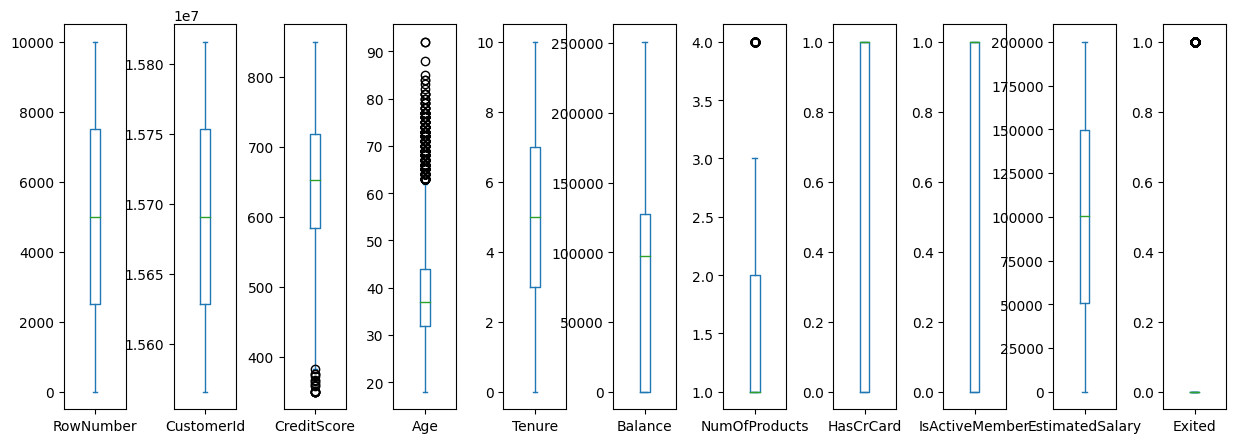

In [7]:
# box plot visualisation
customer_df.plot(kind = 'box', subplots = True, sharey = False, figsize = (15,5))
plt.subplots_adjust(wspace = 0.75)
plt.show()
#outliers in CreditScore, Age, NumOfProducts

In [8]:
# Seperating input and output variables 
X = pd.DataFrame(customer_df.iloc[:, 3:13])
Y = pd.DataFrame(customer_df.iloc[:, 13])

In [9]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


## Data Preprocessing

In [11]:
# Select numeric features for data preprocessing
numeric_features = X.select_dtypes(exclude = ['object']).columns
print(numeric_features)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [12]:
categorical_features = X.select_dtypes(include = ['object']).columns
print(categorical_features)

Index(['Geography', 'Gender'], dtype='object')


In [13]:
# Winsorization for outlier treatment
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = list(numeric_features))
winsor

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['CreditScore', 'Age', 'Tenure', 'Balance',
                      'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                      'EstimatedSalary'])

In [14]:
outlier_pipeline = Pipeline(steps = [('winsor', winsor)])
outlier_pipeline

Pipeline(steps=[('winsor',
                 Winsorizer(capping_method='iqr', fold=1.5, tail='both',
                            variables=['CreditScore', 'Age', 'Tenure',
                                       'Balance', 'NumOfProducts', 'HasCrCard',
                                       'IsActiveMember', 'EstimatedSalary']))])

In [15]:
preprocessor = ColumnTransformer(transformers = [('wins', outlier_pipeline, numeric_features)])
print(preprocessor)

ColumnTransformer(transformers=[('wins',
                                 Pipeline(steps=[('winsor',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['CreditScore',
                                                                        'Age',
                                                                        'Tenure',
                                                                        'Balance',
                                                                        'NumOfProducts',
                                                                        'HasCrCard',
                                                                        'IsActiveMember',
                                                                        'Est

In [16]:
clean = preprocessor.fit(X)
clean

ColumnTransformer(transformers=[('wins',
                                 Pipeline(steps=[('winsor',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['CreditScore',
                                                                        'Age',
                                                                        'Tenure',
                                                                        'Balance',
                                                                        'NumOfProducts',
                                                                        'HasCrCard',
                                                                        'IsActiveMember',
                                                                        'EstimatedSalary']))]),
                                 Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object'))])

In [17]:
cleandata = pd.DataFrame(clean.transform(X), columns = numeric_features)
cleandata.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


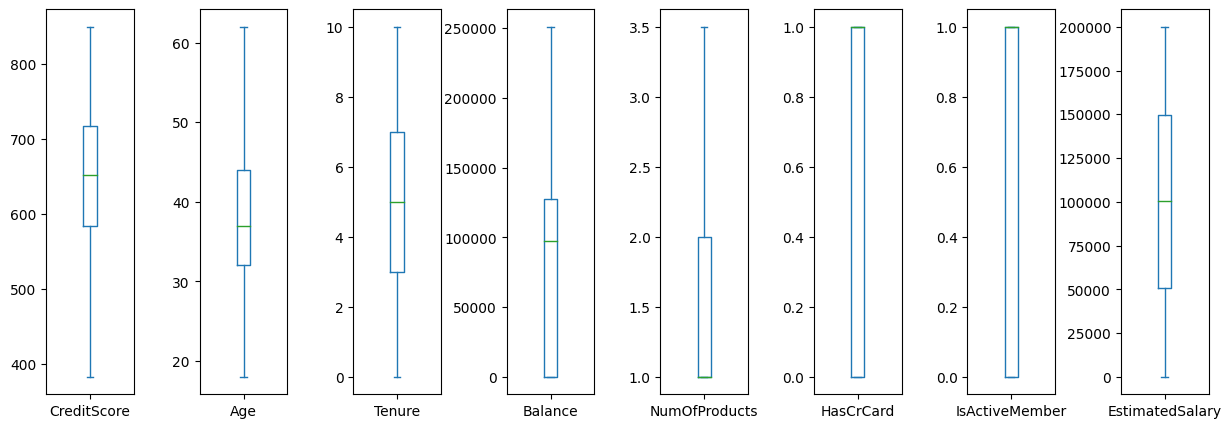

In [18]:
# box plot visualisation
cleandata.plot(kind = 'box', subplots = True, sharey = False, figsize = (15,5))
plt.subplots_adjust(wspace = 0.75)
plt.show()

In [19]:
## Scaling with MinMaxScaler
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, numeric_features)]) # Skips the transformations for remaining columns

scale = scale_columntransfer.fit(cleandata)

In [20]:
scaled_data = pd.DataFrame(scale.transform(cleandata), columns = numeric_features)
scaled_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.572936,0.469564,0.501280,0.304848,0.210880,0.70550,0.515100,0.500441
std,0.206764,0.221516,0.289217,0.248696,0.228033,0.45584,0.499797,0.287580
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.430407,0.318182,0.300000,0.000000,0.000000,0.00000,0.000000,0.254977
50%,0.576017,0.431818,0.500000,0.387402,0.000000,1.00000,1.000000,0.500960
75%,0.717345,0.590909,0.700000,0.508749,0.400000,1.00000,1.000000,0.746955
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [21]:
X.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [22]:
X.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [23]:
## Encoding Categorical features
encoding_pipeline = Pipeline([('onehot', OneHotEncoder())])

preprocess_pipeline = ColumnTransformer([('categorical', encoding_pipeline, categorical_features)])

encode =  preprocess_pipeline.fit(X)

In [24]:
encode_data = pd.DataFrame(encode.transform(X))

In [25]:
# To get feature names for Categorical columns after Onehotencoding 
encode_data.columns = encode.get_feature_names_out(input_features = X.columns)
encode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   categorical__Geography_France   10000 non-null  float64
 1   categorical__Geography_Germany  10000 non-null  float64
 2   categorical__Geography_Spain    10000 non-null  float64
 3   categorical__Gender_Female      10000 non-null  float64
 4   categorical__Gender_Male        10000 non-null  float64
dtypes: float64(5)
memory usage: 390.8 KB


In [26]:
clean_data = pd.concat([scaled_data, encode_data], axis = 1)  # concatenated data will have new sequential index
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CreditScore                     10000 non-null  float64
 1   Age                             10000 non-null  float64
 2   Tenure                          10000 non-null  float64
 3   Balance                         10000 non-null  float64
 4   NumOfProducts                   10000 non-null  float64
 5   HasCrCard                       10000 non-null  float64
 6   IsActiveMember                  10000 non-null  float64
 7   EstimatedSalary                 10000 non-null  float64
 8   categorical__Geography_France   10000 non-null  float64
 9   categorical__Geography_Germany  10000 non-null  float64
 10  categorical__Geography_Spain    10000 non-null  float64
 11  categorical__Gender_Female      10000 non-null  float64
 12  categorical__Gender_Male        1

In [27]:
# Splitting data into training and testing data set
X_train, X_test, Y_train, Y_test = train_test_split(clean_data, Y, test_size = 0.2, random_state = 0) 

In [28]:
X_train.shape

(8000, 13)

In [29]:
X_test.shape

(2000, 13)

In [30]:
Y_train =  np_utils.to_categorical(Y_train)
Y_test =  np_utils.to_categorical(Y_test)

In [31]:
Y_test

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [32]:
Y_test.shape

(2000, 2)

## Model Building

### Building a Multi layer Perceptron model for which we are giving the input to train the ANN.

In [33]:
# Initializing the model
model = Sequential()
model.add(Dense(20, input_dim = 13, activation = 'relu'))
model.add(Dense(20, activation = "tanh"))
model.add(Dense(20, activation = "tanh"))
model.add(Dense(20, activation = "tanh"))
model.add(Dense(2, activation = "softmax"))
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [34]:
# fiiting model on train data
model.fit(x = X_train, y = Y_train, batch_size = 100, epochs = 50, verbose = 1, validation_data = (X_test, Y_test))

Epoch 1/50
80/80 [==============================] - 1s 4ms/step - loss: 0.5276 - accuracy: 0.7906 - val_loss: 0.4872 - val_accuracy: 0.7975
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.7977 - val_loss: 0.4535 - val_accuracy: 0.8025
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.8090 - val_loss: 0.4263 - val_accuracy: 0.8275
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.8171 - val_loss: 0.4176 - val_accuracy: 0.8275
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.8209 - val_loss: 0.4110 - val_accuracy: 0.8310
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8260 - val_loss: 0.4055 - val_accuracy: 0.8365
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8267 - val_loss: 0.4004 - val_accuracy: 0.8410
Epoch 8/50
80/80 [==

In [35]:
# Prediction on test data
results = pd.DataFrame(model.predict(X_test, verbose = 1))
results

63/63 [==============================] - 0s 2ms/step


,0,1
0,0.933111,0.066889
1,0.738065,0.261935
2,0.977058,0.022942
3,0.997521,0.002479
4,0.997719,0.002281
...,...,...
1995,0.999459,0.000541
1996,0.997084,0.002916
1997,0.911453,0.088547
1998,0.937946,0.062053


In [36]:
# Evaluating the model on test data
eval_score_test = model.evaluate(X_test, Y_test, verbose = 1)
# Accuracy on test data set
print("Accuracy: %.3f%%" %(eval_score_test[1]*100))

63/63 [==============================] - 0s 2ms/step - loss: 0.3398 - accuracy: 0.8580
Accuracy: 85.800%


In [37]:
# Accuracy score on train data
eval_score_train = model.evaluate(X_train, Y_train, verbose = 0)
print("Accuracy: %.3f%%" %(eval_score_train[1]*100))

Accuracy: 85.900%


In [ ]:
# Even after increasing the neurons in each layer the accuracy reached saturation.